In [13]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# get input data
#dataset_name = "kr-vs-kp"
dataset_name = "divorce"
#dataset_name = "salud-covid"
df = pd.read_csv(f'./battery_{dataset_name}.csv')
df.head()

,ensemble_criterion,chi_square_percent_point_function,scale_feature_coefficient,min_accuracy_coefficient,min_number_class_per_node,sorting_method,dataset_test_size,dataset_test_categorizable,number_of_rules,cobertura,...,RuleCOSI_accuracy,RuleCOSI_f1_score,RuleCOSI_precision_score,RuleCOSI_recall_score,RuleCOSI_roc_auc_score,rules_accuracy,rules_f1_score,rules_precision_score,rules_recall_score,rules_roc_auc_score
0,gini,0.950,0.01,0.85,3,target_accuracy,17,17,0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.941176,0.947368,0.9,1.0,0.9375
1,gini,0.970,0.01,0.85,3,target_accuracy,17,17,0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.941176,0.947368,0.9,1.0,0.9375
2,gini,0.980,0.01,0.85,3,target_accuracy,17,17,0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.941176,0.947368,0.9,1.0,0.9375
3,gini,0.990,0.01,0.85,3,target_accuracy,17,17,0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.941176,0.947368,0.9,1.0,0.9375
4,gini,0.995,0.01,0.85,3,target_accuracy,17,17,0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.941176,0.947368,0.9,1.0,0.9375


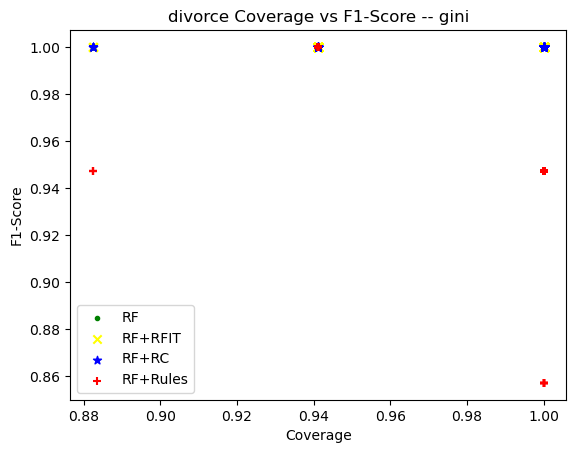

In [14]:

for node_value in df["ensemble_criterion"].unique():
       fig, ax = plt.subplots()
       new_df = df.query(f'ensemble_criterion == \"{node_value}\"')

       ax.scatter(new_df[" cobertura"], new_df[" ensemble_f1_score"], color="green", label="RF", marker=".")
       #ax.scatter(new_df[" cobertura"], new_df[" tree_f1_score"], color="blue", label="tree_f1_score", marker="x")
       ax.scatter(new_df[" cobertura"], new_df[" RuleFit_f1_score"], color="yellow", label="RF+RFIT", marker="x")
       ax.scatter(new_df[" cobertura"], new_df[" RuleCOSI_f1_score"], color="blue", label="RF+RC", marker="*")
       ax.scatter(new_df[" cobertura"], new_df[" rules_f1_score"], color="red", label="RF+Rules", marker="+")
       ax.set(
              xlabel='Coverage',
              ylabel='F1-Score',
              title=f'{dataset_name} Coverage vs F1-Score -- {node_value}')
       plt.legend(loc="lower left")
       #plt.ylim(0.5, 1.1)
       #plt.xlim(0.5, 1.1)
       plt.show()